# Carbon dioxide Emission Prediction Using Multiple Linear Regression

In this session, we used scikit-learn library to implement Multiple linear regression. We again use the Carbon dioxide emission dataset to build a model, Evaluate the model, and finally use model to predict unknown value. Datasets provide model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

To help you compare vehicles from different model years, the fuel consumption ratings have been adjusted to reflect 5-cycle testing. Note that these are approximate values that were generated from the original ratings, not from vehicle testing.

## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

#### IMPORTING THE PACKAGES

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import requests
%matplotlib inline

### Lets Download The Data

In [2]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [3]:
url = path
response = requests.get(url)

with open("FuelConsumption.csv", "wb") as file:
    file.write(response.content)

In [14]:
data = pd.read_csv('FuelConsumption.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Lets bring out the data we will use for regression

In [15]:
data_for_regression = data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
data_for_regression.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267
9,2.4,4,10.6,7.5,9.2,212


#### Let's plot Emission values with respect to Engine size:

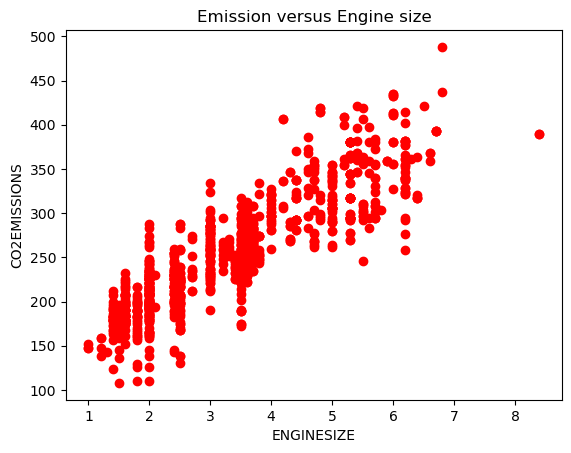

In [16]:
plt.scatter(data_for_regression['ENGINESIZE'], data_for_regression['CO2EMISSIONS'], color='red')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.title('Emission versus Engine size')
plt.show()

#### Lets train and test the dataset
Let's split our dataset into train and test sets. Around 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using the np.random.rand() function.

In [17]:
mask = np.random.rand(len(data)) < 0.8
train = data_for_regression[mask]
test = data_for_regression[~mask]

#### Train Data Distribution

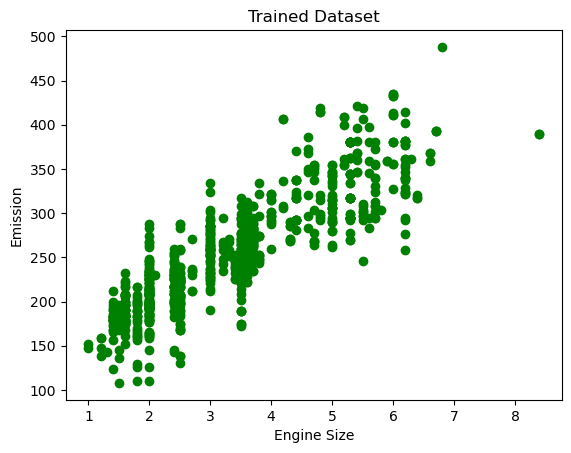

In [18]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="green")
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.title('Trained Dataset')
plt.show()

### Multiple Linear Regression
In reality, there are multiple variables that impact the co2emission. When more than one independent variable is present, the process is called multiple linear regression. An example of multiple linear regression is predicting co2emission using the features FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that multiple linear regression model is the extension of the simple linear regression model.

In [19]:
from sklearn import linear_model

In [21]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['FUELCONSUMPTION_COMB', 'ENGINESIZE', 'CYLINDERS']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)

### Lets print the coefficient and intercept
print('Coefficient:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficient: [[9.92133037 9.29348145 8.08170785]]
Intercept: [63.40337852]


Coefficient and Intercept are the parameters of the fitted line. Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

*   Solving the model parameters analytically using closed-form equations
*   Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

## Prediction

In [24]:
prediction = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print('Residual sum of squares: %.2f' % np.mean((prediction - y) **2))
print('Variance Score: %.2f' % regr.score(x,y))

Residual sum of squares: 671.99
Variance Score: 0.83


C:\Users\wyzzhi fabulouss\Videos\Anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
